<a href="https://colab.research.google.com/github/harishkumar77/ML_20BRS1231/blob/main/20BRS1231_ASSESSMENT_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs as data
from sklearn.cluster import KMeans

Importing the dataset as data 

In [ ]:
data = pd.read_csv('/content/segmented_customers.csv')
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


2D kmeans clustering

In [ ]:
data.drop(['Gender'], axis=1, inplace=True)

In [ ]:
X = data.iloc[:,:-1].values

y = data['Spending Score (1-100)']

In [ ]:
X

array([[  1,  19,  15,  39],
       [  2,  21,  15,  81],
       [  3,  20,  16,   6],
       [  4,  23,  16,  77],
       [  5,  31,  17,  40],
       [  6,  22,  17,  76],
       [  7,  35,  18,   6],
       [  8,  23,  18,  94],
       [  9,  64,  19,   3],
       [ 10,  30,  19,  72],
       [ 11,  67,  19,  14],
       [ 12,  35,  19,  99],
       [ 13,  58,  20,  15],
       [ 14,  24,  20,  77],
       [ 15,  37,  20,  13],
       [ 16,  22,  20,  79],
       [ 17,  35,  21,  35],
       [ 18,  20,  21,  66],
       [ 19,  52,  23,  29],
       [ 20,  35,  23,  98],
       [ 21,  35,  24,  35],
       [ 22,  25,  24,  73],
       [ 23,  46,  25,   5],
       [ 24,  31,  25,  73],
       [ 25,  54,  28,  14],
       [ 26,  29,  28,  82],
       [ 27,  45,  28,  32],
       [ 28,  35,  28,  61],
       [ 29,  40,  29,  31],
       [ 30,  23,  29,  87],
       [ 31,  60,  30,   4],
       [ 32,  21,  30,  73],
       [ 33,  53,  33,   4],
       [ 34,  18,  33,  92],
       [ 35,  

In [ ]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
y_pred = kmeans.fit_predict(X)
print(y_pred)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 4 4 4 4 1 1 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


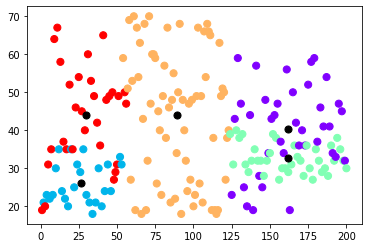

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y_pred, s=50, cmap='rainbow')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=50, alpha=1)

In [ ]:
scores = []
kn = list(range(1,11))
for k in kn:
  model = KMeans(n_clusters=k, init='k-means++', random_state=0)
  model.fit(X)
  scores.append(abs(model.score(X)))

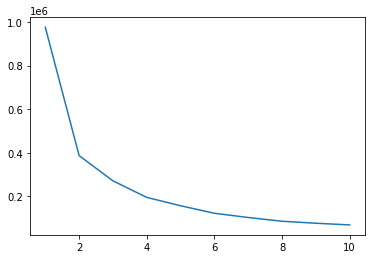

In [ ]:
plt.plot(kn, scores)

3D kmeans clustering

In [ ]:
import numpy as np
from sklearn import datasets
import random
iris=datasets.load_iris()
x=iris.data
target=iris.target
min_of_features=np.zeros((1,3))
max_of_features=np.zeros((1,3))
for i in range(3):
    min_of_features[0,i]=min(x[:,i])
    max_of_features[0,i]=max(x[:,i])
cluster_centers=np.zeros((3,3))
for i in range(3):
    for j in range(3):
        cluster_centers[i,j]=round(random.uniform(min_of_features[0,j],max_of_features[0,j]),3)

In [ ]:
data.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,2,21,15,81,3
2,3,20,16,6,4
3,4,23,16,77,3
4,5,31,17,40,4


In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

In [ ]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster,label
0,1,19,15,39,4,0
1,2,21,15,81,3,0
2,3,20,16,6,4,2
3,4,23,16,77,3,0
4,5,31,17,40,4,0


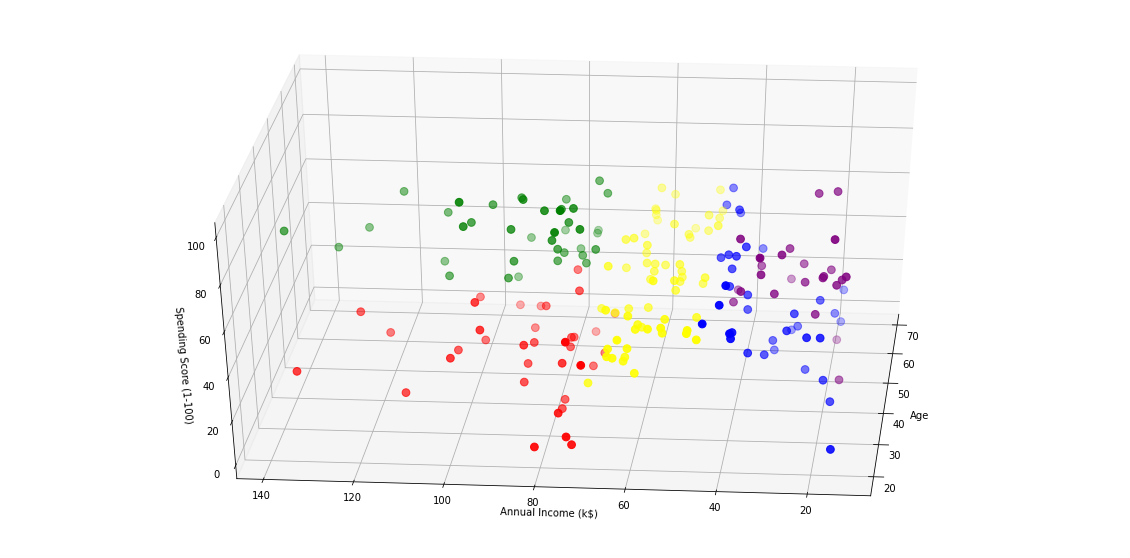

In [ ]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='purple', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='blue', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='green', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()